In [1]:
!pip install kaggle

**Dataset import through API and Unzipping the Zip file**

In [2]:
#configuring path of Json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#API copied from kaggle
!kaggle competitions download -c cifar-10

100% 713M/715M [00:20<00:00, 37.9MB/s]
100% 715M/715M [00:20<00:00, 35.8MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
#to unzip 7z zip file, install py7zr
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.8 MB/s eta 0:00:00


In [8]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


**Import Libraries**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
#checking count of train images in the folder/file
len(filenames)

50000

In [13]:
print(filenames[0:10])

['13463.png', '33712.png', '28812.png', '42143.png', '11062.png', '7108.png', '1102.png', '8700.png', '26232.png', '14729.png']


In [14]:
df_labels = pd.read_csv('/content/trainLabels.csv')

In [15]:
df_labels.shape

(50000, 2)

In [16]:
df_labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
df_labels[df_labels['id'] == 22955]

,id,label
22954,22955,ship


In [18]:
df_labels['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [19]:
label_encode_dict = {'airplane' : 0, 'automobile':1, 'bird': 2, 'cat':3, 'dog' :4, 'deer':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [label_encode_dict[i] for i in df_labels['label']]

In [20]:
print(labels[0:10])

[6, 9, 9, 5, 1, 1, 2, 7, 8, 3]


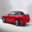

In [21]:
#image processing
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/13463.png')
cv2_imshow(img)

In [22]:
df_labels[df_labels['id'] == 13463]

,id,label
13462,13463,automobile


In [23]:
id_list = df_labels['id']

In [24]:
df_labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
#converting image to numpy array
train_folder = '/content/train/'
data = []

for i in id_list:
  image = Image.open(train_folder + str(i) + '.png')
  image = np.array(image)
  data.append(image)

In [26]:
type(data)

list

In [27]:
len(data)

50000

In [28]:
data[0].shape

(32, 32, 3)

In [29]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [30]:
x = np.array(data)
y = np.array(labels)

In [31]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [33]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


**Scaling the data**

In [34]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [35]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

**Neaural Network-- Building layers -- Compiling Neural network with optimizers, loss and metrics -- fit the model**

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses, metrics

In [37]:
#Building layers in neural network
no_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(no_of_classes, activation = 'softmax')
])

In [38]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [39]:
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs= 10)

Epoch 1/10
1125/1125 [==============================] - 9s 4ms/step - loss: 2.0094 - acc: 0.2579 - val_loss: 1.8921 - val_acc: 0.2993
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.9063 - acc: 0.2947 - val_loss: 1.8706 - val_acc: 0.3125
Epoch 3/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8799 - acc: 0.3001 - val_loss: 1.8893 - val_acc: 0.2837
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8574 - acc: 0.3112 - val_loss: 1.8451 - val_acc: 0.3125
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8481 - acc: 0.3201 - val_loss: 1.8286 - val_acc: 0.3167
Epoch 6/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.8402 - acc: 0.3241 - val_loss: 1.8381 - val_acc: 0.3178
Epoch 7/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8297 - acc: 0.3299 - val_loss: 1.8181 - val_acc: 0.3302
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

In [40]:
from tensorflow.keras import Sequential, models, layers, optimizers
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [41]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [42]:
no_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(no_of_classes, activation = 'relu'))

In [43]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss=losses.sparse_categorical_crossentropy,
              metrics=[metrics.sparse_categorical_accuracy])

In [44]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 475s 389ms/step - loss: 6.8989 - sparse_categorical_accuracy: 0.2014 - val_loss: 4.7632 - val_sparse_categorical_accuracy: 0.4195
Epoch 2/10
1125/1125 [==============================] - 444s 395ms/step - loss: 4.9181 - sparse_categorical_accuracy: 0.3168 - val_loss: 3.1113 - val_sparse_categorical_accuracy: 0.5890
Epoch 3/10
1125/1125 [==============================] - 438s 390ms/step - loss: 4.1438 - sparse_categorical_accuracy: 0.3717 - val_loss: 2.6513 - val_sparse_categorical_accuracy: 0.6453
Epoch 4/10
1125/1125 [==============================] - 445s 396ms/step - loss: 3.7231 - sparse_categorical_accuracy: 0.4228 - val_loss: 2.7669 - val_sparse_categorical_accuracy: 0.6480
Epoch 5/10
1125/1125 [==============================] - 438s 390ms/step - loss: 3.2941 - sparse_categorical_accuracy: 0.4599 - val_loss: 3.2077 - val_sparse_categorical_accuracy: 0.6665
Epoch 6/10
1125/1125 [==============================] - 445s 396ms/ste

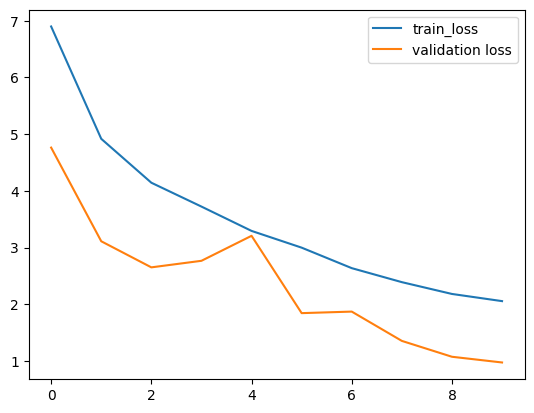

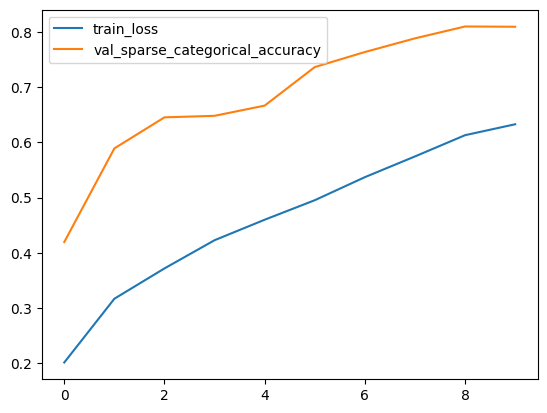

In [50]:
h=history

#plotting the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plotting the accuracy value
plt.plot(h.history['sparse_categorical_accuracy'], label='train_loss')
plt.plot(h.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
plt.legend()
plt.show()

**Predicting the trained model**

Please input the image to be predicted/content/horse.png


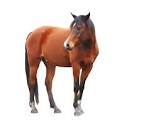

1/1 [==============================] - 0s 26ms/step
[[1.6539487  0.         0.37201014 0.9273454  0.29544714 0.
  0.         3.3528466  0.         0.        ]]
7
------The Predicted Image is a horse-----


In [57]:
input_image_path = input("Please input the image to be predicted")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (32,32))
input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled, (1,32,32,3))
input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print("----The predicted image is a airplane----")

elif input_pred_label == 1:
  print("----The Predicted Image is a automobile----")

elif input_pred_label == 2:
  print("-----The Predicted Image is a bird-----")

elif input_pred_label == 3:
  print("----The Predicted Image is a cat----")

elif input_pred_label == 4:
  print("----The Predicted Image is a dog----")

elif input_pred_label == 5:
  print("-----The Predicted Image is a deer----")

elif input_pred_label == 6:
  print("-----The Predicted Image is a frog------")

elif input_pred_label == 7:
  print("------The Predicted Image is a horse-----")

elif input_pred_label == 8:
  print("-----The Predicted Image is a ship-----")

elif input_pred_label == 9:
  print("------The Predicted Image is a truck-----")



**Saving the trained model**

In [52]:
import pickle
file_name = 'Object_detection.sav'
pickle.dump(model, open(file_name, 'wb'))

load_model = pickle.load(open(file_name, 'rb'))

Please input the image to be predicted/content/horse.png


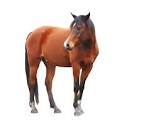

1/1 [==============================] - 0s 68ms/step
[[1.6539487  0.         0.37201014 0.9273454  0.29544714 0.
  0.         3.3528466  0.         0.        ]]
7
------The Predicted Image is a horse-----


In [58]:
input_image_path = input("Please input the image to be predicted")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (32,32))
input_image_scaled = input_image_resized/255

input_image_reshape = np.reshape(input_image_scaled, (1,32,32,3))
input_prediction = load_model.predict(input_image_reshape)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print("----The predicted image is a airplane----")

elif input_pred_label == 1:
  print("----The Predicted Image is a automobile----")

elif input_pred_label == 2:
  print("-----The Predicted Image is a bird-----")

elif input_pred_label == 3:
  print("----The Predicted Image is a cat----")

elif input_pred_label == 4:
  print("----The Predicted Image is a dog----")

elif input_pred_label == 5:
  print("-----The Predicted Image is a deer----")

elif input_pred_label == 6:
  print("-----The Predicted Image is a frog------")

elif input_pred_label == 7:
  print("------The Predicted Image is a horse-----")

elif input_pred_label == 8:
  print("-----The Predicted Image is a ship-----")

elif input_pred_label == 9:
  print("------The Predicted Image is a truck-----")
